<a href="https://colab.research.google.com/github/LokeshKumarDas/Anusadhan/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torch-geometric matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
from torch_geometric.utils import to_networkx, from_networkx
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

Epoch [0/100], Loss: 79.1889
Epoch [10/100], Loss: 25.9652
Epoch [20/100], Loss: 22.7856
Epoch [30/100], Loss: 25.9120
Epoch [40/100], Loss: 23.5694
Epoch [50/100], Loss: 29.1433
Epoch [60/100], Loss: 24.9169
Epoch [70/100], Loss: 24.2640
Epoch [80/100], Loss: 21.5339
Epoch [90/100], Loss: 25.8029


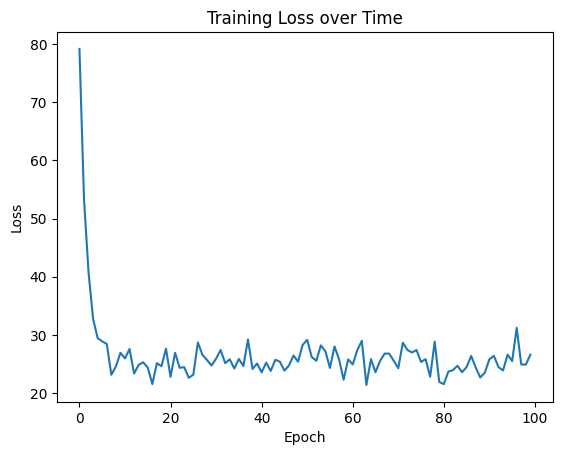

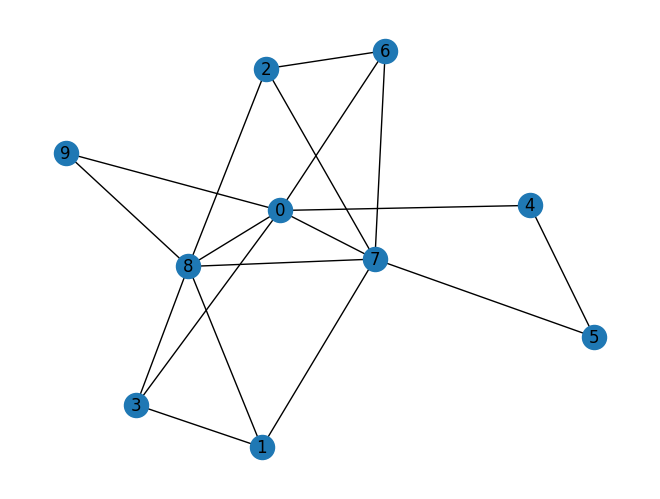

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.loader import DataLoader  # Updated import
from torch_geometric.utils import to_networkx, from_networkx
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Diffusion Model Components
class GraphDiffusionModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphDiffusionModel, self).__init__()
        self.fc1 = nn.Linear(in_channels, hidden_channels)
        self.fc2 = nn.Linear(hidden_channels, out_channels)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def sample_noise(self, graph, t):
        # Sample random noise based on timestep t
        noise = torch.randn_like(graph.x) * (1 - t)
        return noise

# Denoising function for graph nodes
def denoise_graph(model, noisy_graph):
    return model(noisy_graph.x)

# Loss function (can be graph reconstruction loss or node-level MSE)
def compute_loss(denoised_graph, original_graph):
    loss_fn = nn.MSELoss()
    # Access the 'x' attribute directly from the Data object
    return loss_fn(denoised_graph, original_graph.x)

# Graph Generation Techniques
class GraphRNN(nn.Module):
    # Dummy GraphRNN model
    def __init__(self, input_dim, hidden_dim):
        super(GraphRNN, self).__init__()
        self.rnn = nn.GRU(input_dim, hidden_dim, batch_first=True)

    def forward(self, x, h):
        out, h = self.rnn(x, h)
        return out, h

class GraphVAE(nn.Module):
    # Dummy GraphVAE model
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(GraphVAE, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        self.decoder = nn.Linear(latent_dim, input_dim)

    def forward(self, x):
        h = torch.relu(self.encoder(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        z = self.reparameterize(mu, logvar)
        return torch.sigmoid(self.decoder(z))

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

class GraphFlow(nn.Module):
    # Dummy GraphFlow model
    def __init__(self, input_dim, hidden_dim):
        super(GraphFlow, self).__init__()
        self.flow = nn.Linear(input_dim, hidden_dim)

    def forward(self, x):
        return self.flow(x)

# Training Loop
def train_model(model, data_loader, epochs=100):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for graph in data_loader:
            t = np.random.uniform(0, 1)  # Diffusion timestep
            noisy_graph = graph.clone()



            noisy_graph.x += model.sample_noise(graph, t)  # Add noise

            denoised_graph = denoise_graph(model, noisy_graph)  # Denoise step
            loss = compute_loss(denoised_graph, graph)  # Compute loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        losses.append(epoch_loss)
        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {epoch_loss:.4f}')

    return losses

# Data Loading and Visualization
def visualize_graph(graph):
    G = to_networkx(graph, to_undirected=True)
    nx.draw(G, with_labels=True)
    plt.show()

# Example Graph Dataset (e.g., random graphs)
def generate_random_graph_dataset(num_samples, num_nodes=10):
    graphs = []
    for _ in range(num_samples):
        edges = []
        for i in range(num_nodes):
            for j in range(i + 1, num_nodes):
                if np.random.rand() < 0.5:  # Probability of edge
                    edges.append((i, j))
        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
        x = torch.randn((num_nodes, 3))  # Random node features
        graph = Data(x=x, edge_index=edge_index)
        graphs.append(graph)
    return graphs

# Main Execution
if __name__ == "__main__":
    # Load Data
    graph_dataset = generate_random_graph_dataset(num_samples=100, num_nodes=10)
    data_loader = DataLoader(graph_dataset, batch_size=1, shuffle=True)  # Updated DataLoader

    # Model Instantiation
    model = GraphDiffusionModel(in_channels=3, hidden_channels=16, out_channels=3)

    # Train the Model
    losses = train_model(model, data_loader, epochs=100)

    # Plot Loss over Time
    plt.plot(losses)
    plt.title("Training Loss over Time")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # Visualize a Generated Graph
    test_graph = graph_dataset[0]
    visualize_graph(test_graph)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.loader import DataLoader
from torch_geometric.utils import to_networkx
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Diffusion Model Components
class GraphDiffusionModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphDiffusionModel, self).__init__()
        self.fc1 = nn.Linear(in_channels, hidden_channels)
        self.fc2 = nn.Linear(hidden_channels, out_channels)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def sample_noise(self, graph, t):
        # Sample random noise based on timestep t
        noise = torch.randn_like(graph.x) * (1 - t)
        return noise

# Denoising function for graph nodes
def denoise_graph(model, noisy_graph):
    return model(noisy_graph.x)

# Loss function
def compute_loss(denoised_graph, original_graph):
    loss_fn = nn.MSELoss()
    return loss_fn(denoised_graph, original_graph.x)

# Graph Generation Techniques
class GraphRNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(GraphRNN, self).__init__()
        self.rnn = nn.GRU(input_dim, hidden_dim, batch_first=True)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), 16).to(x.device)  # Initialize hidden state
        out, _ = self.rnn(x.unsqueeze(1), h0)  # Add sequence length dimension
        return out.squeeze(1)  # Remove the sequence dimension for output

class GraphVAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(GraphVAE, self).__init__()
        self.encoder = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        self.decoder = nn.Linear(latent_dim, input_dim)

    def forward(self, x):
        h = torch.relu(self.encoder(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        z = self.reparameterize(mu, logvar)
        return torch.sigmoid(self.decoder(z))

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

class GraphFlow(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(GraphFlow, self).__init__()
        self.flow = nn.Linear(input_dim, hidden_dim)

    def forward(self, x):
        return self.flow(x)

# Training Loop for Graph Diffusion Model
def train_diffusion_model(model, data_loader, epochs=100):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for graph in data_loader:
            t = np.random.uniform(0, 1)  # Diffusion timestep
            noisy_graph = graph.clone()
            noisy_graph.x += model.sample_noise(graph, t)  # Add noise

            denoised_graph = denoise_graph(model, noisy_graph)  # Denoise step
            loss = compute_loss(denoised_graph, graph)  # Compute loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        losses.append(epoch_loss)
        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {epoch_loss:.4f}')

    return losses

# Training Loop for Other Models
def train_other_models(model, data_loader, epochs=100):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for graph in data_loader:
            # For other models, just use the original graph for denoising
            denoised_graph = model(graph.x)
            loss = compute_loss(denoised_graph, graph)  # Compute loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        losses.append(epoch_loss)
        if epoch % 10 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {epoch_loss:.4f}')

    return losses

# Data Loading and Visualization
def visualize_graph(graph):
    G = to_networkx(graph, to_undirected=True)
    nx.draw(G, with_labels=True)
    plt.show()

# Example Graph Dataset (e.g., random graphs)
def generate_random_graph_dataset(num_samples, num_nodes=10):
    graphs = []
    for _ in range(num_samples):
        edges = []
        for i in range(num_nodes):
            for j in range(i + 1, num_nodes):
                if np.random.rand() < 0.5:  # Probability of edge
                    edges.append((i, j))
        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
        x = torch.randn((num_nodes, 3))  # Random node features
        graph = Data(x=x, edge_index=edge_index)
        graphs.append(graph)
    return graphs

# Main Execution
if __name__ == "__main__":
    # Load Data
    graph_dataset = generate_random_graph_dataset(num_samples=100, num_nodes=10)
    data_loader = DataLoader(graph_dataset, batch_size=1, shuffle=True)

    # Model Instances
    models = {
        "Diffusion Model": GraphDiffusionModel(in_channels=3, hidden_channels=16, out_channels=3),
        "Graph RNN": GraphRNN(input_dim=3, hidden_dim=16),
        "Graph VAE": GraphVAE(input_dim=3, hidden_dim=16, latent_dim=8),
        "Graph Flow": GraphFlow(input_dim=3, hidden_dim=16)
    }

    all_losses = {}

    # Train and collect losses
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        if model_name == "Diffusion Model":
            losses = train_diffusion_model(model, data_loader, epochs=100)
        else:
            losses = train_other_models(model, data_loader, epochs=100)

        all_losses[model_name] = losses
        final_loss = losses[-1]
        print(f"Final loss for {model_name}: {final_loss:.4f}")

    # Plot Losses
    plt.figure(figsize=(12, 6))
    for model_name, losses in all_losses.items():
        plt.plot(losses, label=model_name)
    plt.title("Training Loss over Time for Different Models")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Determine Best Model
    best_model = min(all_losses, key=lambda k: all_losses[k][-1])
    print(f"The best model according to final loss is: {best_model}")


Training Diffusion Model...
Epoch [0/100], Loss: 78.2680
Epoch [10/100], Loss: 23.9292
Epoch [20/100], Loss: 27.3993
Epoch [30/100], Loss: 25.7262
Epoch [40/100], Loss: 24.7012
Epoch [50/100], Loss: 23.7211
Epoch [60/100], Loss: 20.7880
Epoch [70/100], Loss: 24.5336
Epoch [80/100], Loss: 27.3481
Epoch [90/100], Loss: 27.8748
Final loss for Diffusion Model: 24.3156
Training Graph RNN...


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([10, 3])) that is different to the input size (torch.Size([10, 16])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (16) must match the size of tensor b (3) at non-singleton dimension 1